In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import skimage as ski
import random


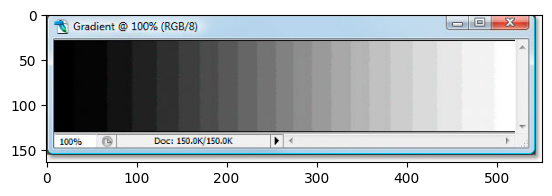

In [5]:
# original img
img = plt.imread('/gradient-8bit-levels2.jpg')
plt.imshow(img)

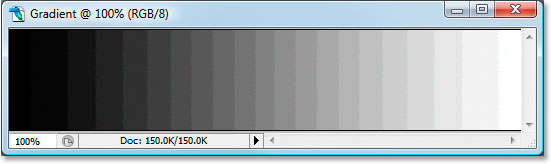

In [6]:
# original img
img = cv2.imread("/gradient-8bit-levels2.jpg")
cv2_imshow(img)



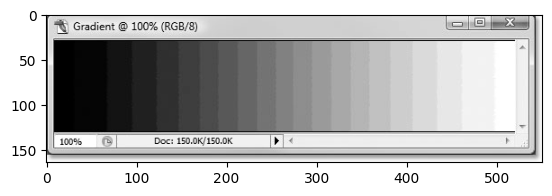

In [7]:
# gray img
gray= cv2.cvtColor(plt.imread('/gradient-8bit-levels2.jpg'), cv2.COLOR_RGB2GRAY)
plt.imshow(gray, 'gray')

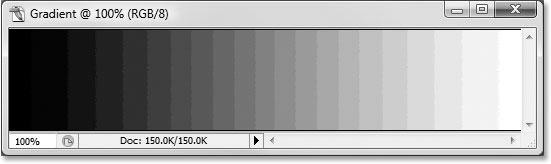

In [8]:
# gray img
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2_imshow(gray_img)

In [9]:
# add gaussian noise
print (gray_img.shape)

(164, 551)


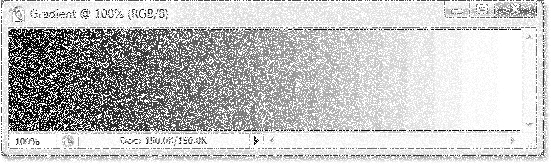

In [10]:
mean1 = 4
stddev1 = 10  # Adjust the standard deviation to control the noise level
gaussian_noise1 = np.random.normal(mean1, stddev1, gray_img.shape).astype(np.uint8)
gaussian_niosy_img1  = cv2.add(gray_img, gaussian_noise1)
cv2_imshow( gaussian_niosy_img1)

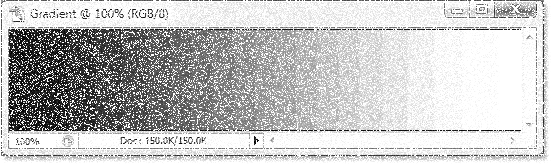

In [11]:
mean2 = 15
stddev2 = 20  # Adjust the standard deviation to control the noise level
gaussian_noise2 = np.random.normal(mean2, stddev2, gray_img.shape).astype(np.uint8)
gaussian_niosy_img2  = cv2.add(gray_img, gaussian_noise2)
cv2_imshow( gaussian_niosy_img2)

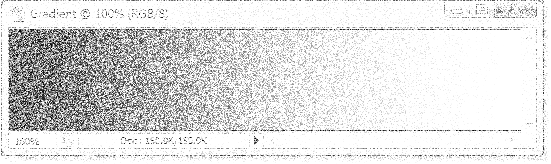

In [12]:
mean3 = 30
stddev3 = 150  # Adjust the standard deviation to control the noise level
gaussian_noise3 = np.random.normal(mean3, stddev3, gray_img.shape).astype(np.uint8)
gaussian_niosy_img3  = cv2.add(gray_img, gaussian_noise3)
cv2_imshow( gaussian_niosy_img3)

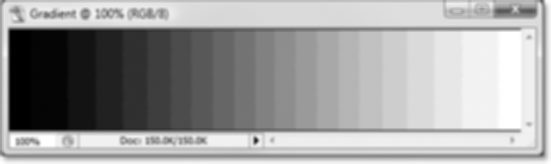

In [13]:
# add gaussian filter
filter_size = (5, 5)
sigma =1.5
gaussian_filtered_image_1 = cv2.GaussianBlur(gray_img, filter_size, sigma)
cv2_imshow(gaussian_filtered_image_1)

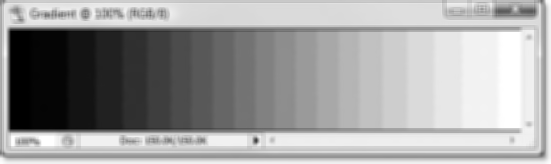

In [14]:

sigma =13.5
gaussian_filtered_image_2 = cv2.GaussianBlur(gray_img, filter_size, sigma)
cv2_imshow(gaussian_filtered_image_2)

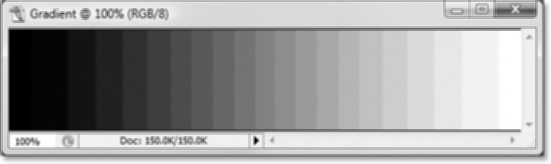

In [15]:
filter_size = (3, 3)
sigma =13.5
gaussian_filtered_image_3 = cv2.GaussianBlur(gray_img, filter_size, sigma)
cv2_imshow(gaussian_filtered_image_3)

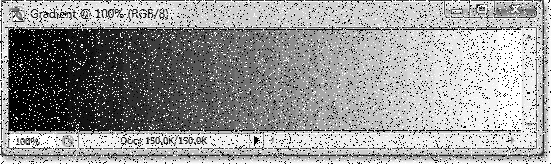

In [16]:
#  salt & pepper noise
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    threshhold = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > threshhold:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output


sp_noise_img1 = sp_noise(gray,0.07)
cv2_imshow(sp_noise_img1)

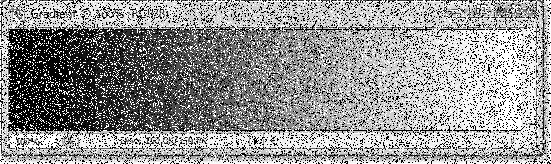

In [17]:
sp_noise_img2 = sp_noise(gray,0.17)
cv2_imshow(sp_noise_img2)

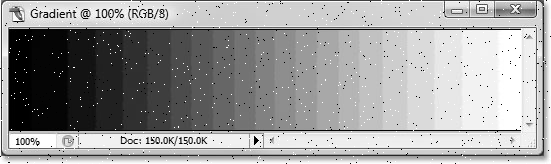

In [18]:
sp_noise_img3 = sp_noise(gray,0.007)
cv2_imshow(sp_noise_img3)

Text(0.5, 1.0, 's&p_noise_img3,p=0.007')

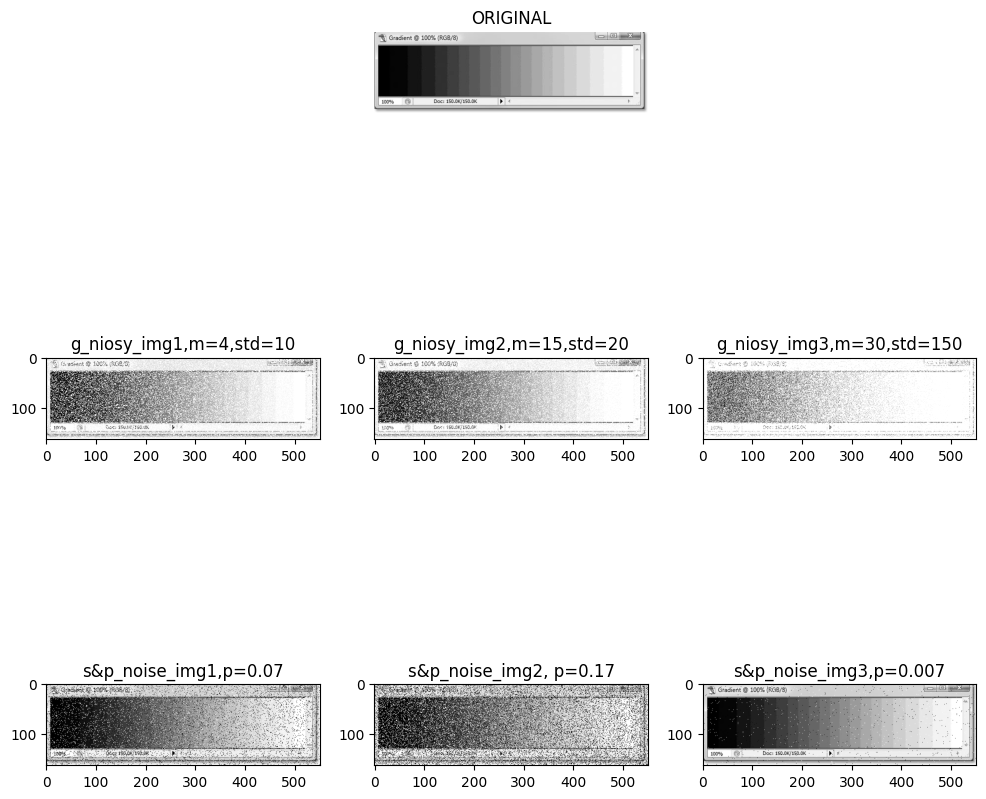

In [19]:
# create figure
fig = plt.figure(figsize=(12, 12))
rows = 3
columns = 3
# Add a subplot at the 1st position
fig.add_subplot(rows, columns, 2)
plt.imshow(gray, cmap = 'gray')
plt.axis('off')

plt.title("ORIGINAL")
# Add a subplot at the 2st position
fig.add_subplot(rows, columns, 4)
plt.imshow(gaussian_niosy_img1, cmap = 'gray')
plt.title("g_niosy_img1,m=4,std=10")
# Add a subplot at the 3st position
fig.add_subplot(rows, columns, 5)
plt.imshow(gaussian_niosy_img2,cmap = 'gray')
plt.title("g_niosy_img2,m=15,std=20")
# Add a subplot at the 4st position
fig.add_subplot(rows, columns, 6)
plt.imshow(gaussian_niosy_img3,cmap = 'gray')
plt.title("g_niosy_img3,m=30,std=150")
# Add a subplot at the 5st position
fig.add_subplot(rows, columns, 7)
plt.imshow(sp_noise_img1,cmap = 'gray')
plt.title("s&p_noise_img1,p=0.07")
# Add a subplot at the 6st position
fig.add_subplot(rows, columns, 8)
plt.imshow(sp_noise_img2,cmap = 'gray')
plt.title("s&p_noise_img2, p=0.17")
# Add a subplot at the 7st position
fig.add_subplot(rows, columns, 9)
plt.imshow(sp_noise_img3,cmap = 'gray')
plt.title("s&p_noise_img3,p=0.007")



all above operations in **spatial domain**,
now we work in frequency domain

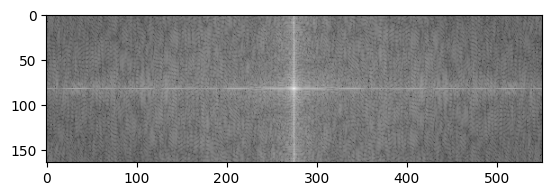

In [20]:
# do dft saving as complex output
dft = np.fft.fft2(gray, axes=(0,1))

# apply shift of origin to center of image
dft_shift = np.fft.fftshift(dft)

# generate spectrum from magnitude image (for viewing only)
mag = np.abs(dft_shift)
spectrum = np.log(mag) / 20
plt.imshow(spectrum, cmap='gray')

In [21]:

dft2 = np.fft.fft2(gaussian_niosy_img1, axes=(0,1))
dft_shift2 = np.fft.fftshift(dft2)
mag2 = np.abs(dft_shift2)
spectrum2 = np.log(mag2) / 20
# plt.imshow(spectrum2, cmap='gray')

dft3 = np.fft.fft2(gaussian_niosy_img2, axes=(0,1))
dft_shift3 = np.fft.fftshift(dft3)
mag3 = np.abs(dft_shift3)
spectrum3 = np.log(mag3) / 20
# plt.imshow(spectrum3, cmap='gray')

dft4 = np.fft.fft2(gaussian_niosy_img3, axes=(0,1))
dft_shift4 = np.fft.fftshift(dft4)
mag4 = np.abs(dft_shift4)
spectrum4 = np.log(mag4) / 20
# plt.imshow(spectrum4, cmap='gray')

dft5 = np.fft.fft2(sp_noise_img1, axes=(0,1))
dft_shift5 = np.fft.fftshift(dft5)
mag5 = np.abs(dft_shift5)
spectrum5 = np.log(mag5) / 20
# plt.imshow(spectrum5, cmap='gray')

dft6 = np.fft.fft2(sp_noise_img2, axes=(0,1))
dft_shift6 = np.fft.fftshift(dft6)
mag6 = np.abs(dft_shift6)
spectrum6 = np.log(mag6) / 20
# plt.imshow(spectrum6, cmap='gray')

dft7 = np.fft.fft2(sp_noise_img3, axes=(0,1))
dft_shift7 = np.fft.fftshift(dft7)
mag7 = np.abs(dft_shift7)
spectrum7 = np.log(mag7) / 20
# plt.imshow(spectrum7, cmap='gray')


Text(0.5, 1.0, 'spectrum7')

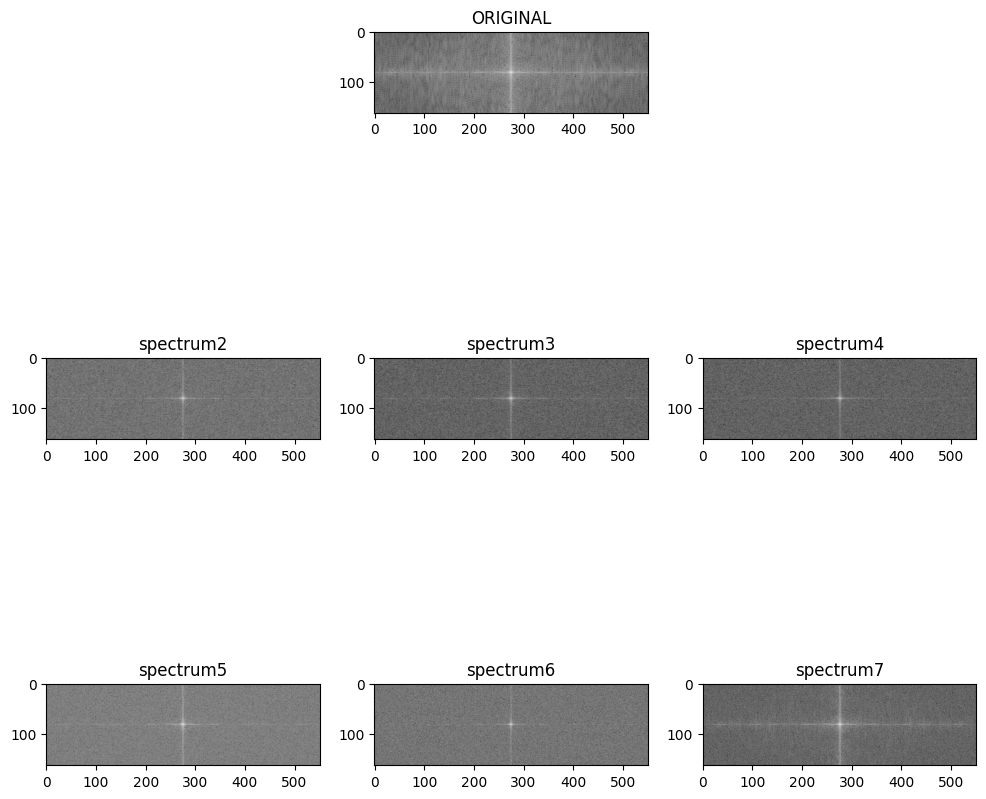

In [22]:
# create figure
fig2 = plt.figure(figsize=(12, 12))
rows = 3
columns = 3
# Add a subplot at the 1st position
fig2.add_subplot(rows, columns, 2)
plt.imshow(spectrum, cmap = 'gray')
plt.title("ORIGINAL")
# Add a subplot at the 2st position
fig2.add_subplot(rows, columns, 4)
plt.imshow(spectrum2, cmap = 'gray')
plt.title("spectrum2")
# Add a subplot at the 3st position
fig2.add_subplot(rows, columns, 5)
plt.imshow(spectrum3,cmap = 'gray')
plt.title("spectrum3")
# Add a subplot at the 4st position
fig2.add_subplot(rows, columns, 6)
plt.imshow(spectrum4,cmap = 'gray')
plt.title("spectrum4")
# Add a subplot at the 5st position
fig2.add_subplot(rows, columns, 7)
plt.imshow(spectrum5,cmap = 'gray')
plt.title("spectrum5")
# Add a subplot at the 6st position
fig2.add_subplot(rows, columns, 8)
plt.imshow(spectrum6,cmap = 'gray')
plt.title("spectrum6")
# Add a subplot at the 7st position
fig2.add_subplot(rows, columns, 9)
plt.imshow(spectrum7,cmap = 'gray')
plt.title("spectrum7")


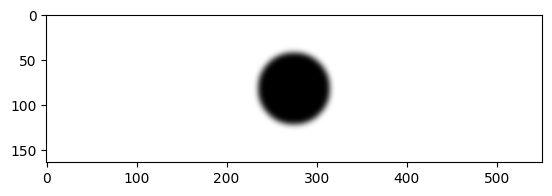

In [26]:
# create circle mask(high pass)
radius = 40
mask = np.zeros_like(gray)
cy = mask.shape[0] // 2
cx = mask.shape[1] // 2
cv2.circle(mask, (cx,cy), radius, (255,255,255), -1)[0]

# blur the mask
mask2 =255 - cv2.GaussianBlur(mask, (19,19), 0)

plt.imshow(mask2, cmap='gray')

In [27]:
# apply mask to dft_shift

dft_shift_masked2 = np.multiply(dft_shift,mask2) / 255
mag = np.abs(dft_shift_masked2)
spec = np.log(mag) / 20
# plt.imshow(spec, cmap='gray')

dft_shift_masked2_2 = np.multiply(dft_shift2,mask2) / 255
mag2 = np.abs(dft_shift_masked2_2)
spec2 = np.log(mag2) / 20
# plt.imshow(spec2, cmap='gray')

dft_shift_masked2_3 = np.multiply(dft_shift3,mask2) / 255
mag3 = np.abs(dft_shift_masked2_3)
spec3 = np.log(mag3) / 20
# plt.imshow(spec3, cmap='gray')

dft_shift_masked2_4 = np.multiply(dft_shift4,mask2) / 255
mag4 = np.abs(dft_shift_masked2_4)
spec4 = np.log(mag4) / 20
# plt.imshow(spec4, cmap='gray')

dft_shift_masked2_5 = np.multiply(dft_shift5,mask2) / 255
mag5 = np.abs(dft_shift_masked2_5)
spec5 = np.log(mag5) / 20
# plt.imshow(spec5, cmap='gray')

dft_shift_masked2_6 = np.multiply(dft_shift6,mask2) / 255
mag6 = np.abs(dft_shift_masked2_6)
spec6 = np.log(mag6) / 20
# plt.imshow(spec6, cmap='gray')

dft_shift_masked2_7 = np.multiply(dft_shift7,mask2) / 255
mag7= np.abs(dft_shift_masked2_7)
spec7 = np.log(mag7) / 20
# plt.imshow(spec7, cmap='gray')


<ipython-input-27-74b771b13211>:5: RuntimeWarning: divide by zero encountered in log
  spec = np.log(mag) / 20
<ipython-input-27-74b771b13211>:10: RuntimeWarning: divide by zero encountered in log
  spec2 = np.log(mag2) / 20
<ipython-input-27-74b771b13211>:15: RuntimeWarning: divide by zero encountered in log
  spec3 = np.log(mag3) / 20
<ipython-input-27-74b771b13211>:20: RuntimeWarning: divide by zero encountered in log
  spec4 = np.log(mag4) / 20
<ipython-input-27-74b771b13211>:25: RuntimeWarning: divide by zero encountered in log
  spec5 = np.log(mag5) / 20
<ipython-input-27-74b771b13211>:30: RuntimeWarning: divide by zero encountered in log
  spec6 = np.log(mag6) / 20
<ipython-input-27-74b771b13211>:35: RuntimeWarning: divide by zero encountered in log
  spec7 = np.log(mag7) / 20


Text(0.5, 1.0, 'spectrum7')

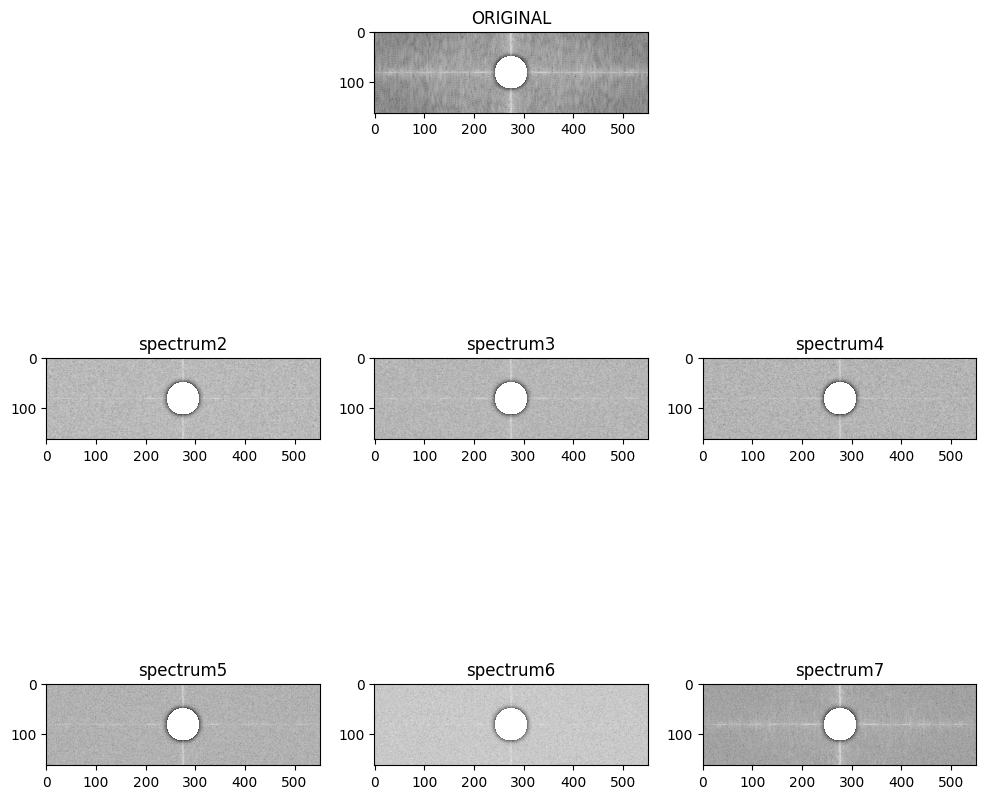

In [28]:
# create figure
fig3 = plt.figure(figsize=(12, 12))
rows = 3
columns = 3
# Add a subplot at the 1st position
fig3.add_subplot(rows, columns, 2)
plt.imshow(spec, cmap = 'gray')
plt.title("ORIGINAL")
# Add a subplot at the 2st position
fig3.add_subplot(rows, columns, 4)
plt.imshow(spec2, cmap = 'gray')
plt.title("spectrum2")
# Add a subplot at the 3st position
fig3.add_subplot(rows, columns, 5)
plt.imshow(spec3,cmap = 'gray')
plt.title("spectrum3")
# Add a subplot at the 4st position
fig3.add_subplot(rows, columns, 6)
plt.imshow(spec4,cmap = 'gray')
plt.title("spectrum4")
# Add a subplot at the 5st position
fig3.add_subplot(rows, columns, 7)
plt.imshow(spec5,cmap = 'gray')
plt.title("spectrum5")
# Add a subplot at the 6st position
fig3.add_subplot(rows, columns, 8)
plt.imshow(spec6,cmap = 'gray')
plt.title("spectrum6")
# Add a subplot at the 7st position
fig3.add_subplot(rows, columns, 9)
plt.imshow(spec7,cmap = 'gray')
plt.title("spectrum7")

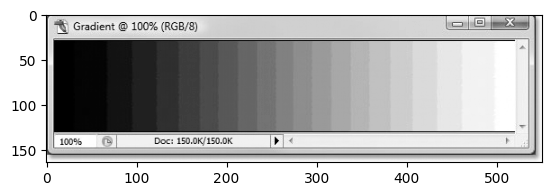

In [ ]:
# shift origin from center to upper left corner
back_ishift = np.fft.ifftshift(dft_shift)

back_ishift_masked2 = np.fft.ifftshift(dft_shift_masked2)


# do inverse dft saving as complex output
img_back = np.fft.ifft2(back_ishift, axes=(0,1))

img_filtered2 = np.fft.ifft2(back_ishift_masked2, axes=(0,1))

# combine complex real and imaginary components to form (the magnitude for) the original image again
img_back = np.abs(img_back).clip(0,255).astype(np.uint8)

img_filtered2 = np.abs(img_filtered2).clip(0,255).astype(np.uint8)

plt.imshow(img_back, cmap='gray')